In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, pearsonr, skew, kurtosis
import math
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from scipy.stats import f_oneway

In [ ]:
from numpy import mean
from math import sqrt
from scipy.stats import sem, t

#**Task 1**


## Task 1
An organization recruits 30 students to participate in a study. For next 4 weeks, the students are randomly assigned to use one of the 3 studying approaches to prepare for an exam. At the end of the training period, all students take same each group.  Following are the exam scores for each group:

<img width="444" height="555" alt="Screenshot 2021-09-15 at 1 36 16 PM" src="https://user-images.githubusercontent.com/43731599/133395598-1c56714d-f9dd-466b-ae8c-0a8f25a2c69f.png">


In [ ]:
group1=np.array([85,86,88,75,78,94,98,79,71,80])
group2=np.array([79,78,88,94,92,85,83,85,82,81])
group3=np.array([91,92,93,85,87,84,82,88,95,96])

#Q1

In [ ]:
def calculate(group):
  
  length = len(group)
  group = np.sort(group)
  mean = sum(group)/length
  if (length%2):
    median = group[length//2]
  else:
    median = (group[length//2] + group[length//2 - 1])/2

  variance = sum((group - mean)**2)/length
  std = sqrt(variance)
  skewness = sum((group - mean)**3)/(length*std**3)
  kurtosis_value = sum((group - mean)**4)/(length*variance*variance)
  kurtosis_value = kurtosis_value - 3

  return mean, median, variance, std, skewness, kurtosis_value

Group1

In [ ]:
mean, median, variance, std, skewness, kurtosis_value = calculate(group1)
print(f'Mean = {mean}, Median = {median}')
print(f'Variance = {variance}, Standard Deviation = {std}')
print(f'Skewness = {skewness}, Kurtosis = {kurtosis_value}')

Mean = 83.4, Median = 82.5
Variance = 64.04, Standard Deviation = 8.002499609497024
Skewness = 0.3201841554571654, Kurtosis = -0.8410405582706946


In [ ]:
mean, median, skewness, kurtosis_value = np.mean(group1), np.median(group1), skew(group1), kurtosis(group1)
print(f'Mean = {mean}, Median = {median}')
print(f'Skewness = {skewness}, Kurtosis = {kurtosis_value}')

Mean = 83.4, Median = 82.5
Skewness = 0.32018415545716544, Kurtosis = -0.841040558270695


Group2

In [ ]:
mean, median, variance, std, skewness, kurtosis_value = calculate(group2)
print(f'Mean = {mean}, Median = {median}')
print(f'Variance = {variance}, Standard Deviation = {std}')
print(f'Skewness = {skewness}, Kurtosis = {kurtosis_value}')

Mean = 84.7, Median = 84.0
Variance = 25.21, Standard Deviation = 5.020956084253277
Skewness = 0.5278629787066954, Kurtosis = -0.8351499132790328


In [ ]:
mean, median, skewness, kurtosis_value = np.mean(group2), np.median(group2), skew(group2), kurtosis(group2)
print(f'Mean = {mean}, Median = {median}')
print(f'Skewness = {skewness}, Kurtosis = {kurtosis_value}')

Mean = 84.7, Median = 84.0
Skewness = 0.5278629787066953, Kurtosis = -0.8351499132790328


Group3

In [ ]:
mean, median, variance, std, skewness, kurtosis_value = calculate(group3)
print(f'Mean = {mean}, Median = {median}')
print(f'Variance = {variance}, Standard Deviation = {std}')
print(f'Skewness = {skewness}, Kurtosis = {kurtosis_value}')

Mean = 89.3, Median = 89.5
Variance = 20.810000000000002, Standard Deviation = 4.561797891182818
Skewness = -0.07432765851857329, Kurtosis = -1.3094067951011432


In [ ]:
mean, median, skewness, kurtosis_value = np.mean(group3), np.median(group3), skew(group3), kurtosis(group3)
print(f'Mean = {mean}, Median = {median}')
print(f'Skewness = {skewness}, Kurtosis = {kurtosis_value}')

Mean = 89.3, Median = 89.5
Skewness = -0.07432765851857343, Kurtosis = -1.309406795101143


#Q2

In [ ]:
from numpy import mean

In [ ]:
#Calculate Mean of each group
m1 = np.mean(group1)
m2 = np.mean(group2)
m3 = np.mean(group3)

#Overall Mean
m = (m1+m2+m3)/3

#Between Group mean sum of squares
SSB=10*((m1-m)**2+(m2-m)**2+(m3-m)**2)
MSB=SSB/2

#Within Group mean sum of squares
SSW = np.sum((group1 - m1)**2) + np.sum((group2 - m2)**2) + np.sum((group3 - m3)**2)
MSW = SSW/27

#Calculate F Statistics
F = MSB/MSW

In [ ]:
from scipy.stats import f
p = 1-f.cdf(F, 2, 27)
print(f'F-statistic = {F}, P-value = {p}')

F-statistic = 2.3575322551335565, P-value = 0.11384795345837273


we compare this to the F critical value found in the F distribution table with the values :\
α (significance level) = 0.05\
DF1 (numerator degrees of freedom) = 2\
DF2 (denominator degrees of freedom) = 27

If the F test statistic in the ANOVA table is less than the F critical value in the F distribution table, then we fail to reject the null hypothesis.

P-value > 0.05 (significance value) hence we fail to reject the null hyptohesis

#Q3

In [ ]:
stats.f_oneway(group1,group2,group3)

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)

P value > 0.05 indicates that there is possibility of mean of 3 groups being from same distribution and hence we cannot reject the Null hypothesis

#**Task2**

#Q1

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/stcp-Rdataset-Diet.csv")

In [ ]:
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
74,75,1,49,177,84,3,79.9
48,18,1,50,160,78,1,73.9
72,73,1,40,179,79,3,74.5
64,50,1,39,180,80,2,81.4
34,56,0,36,160,66,3,58.2
71,72,1,26,179,78,3,69.4
62,48,1,40,171,79,2,72.9
52,22,1,42,166,85,1,81.5
32,54,0,21,159,64,3,60.6
20,31,0,20,169,62,2,55.0


In [ ]:
df[df['gender'] == ' ']

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0


In [ ]:
df = df[df['gender'] != ' ']

In [ ]:
df['gender'].value_counts()

0    43
1    33
Name: gender, dtype: int64

Text(0, 0.5, 'Weight')

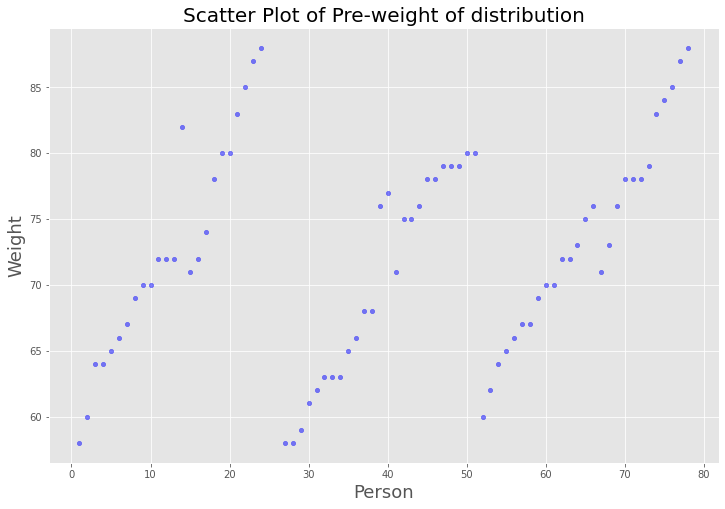

In [ ]:
axl = df.plot(kind='scatter', x='Person', y='pre.weight', color='blue', alpha=0.5, figsize=(12, 8))
plt.title('Scatter Plot of Pre-weight of distribution', size=20)
plt.xlabel('Person', size=18)
plt.ylabel('Weight', size=18)

In [ ]:
df = df.apply(pd.to_numeric)
df.dtypes

Person            int64
gender            int64
Age               int64
Height            int64
pre.weight        int64
Diet              int64
weight6weeks    float64
dtype: object

Text(0, 0.5, 'Weight')

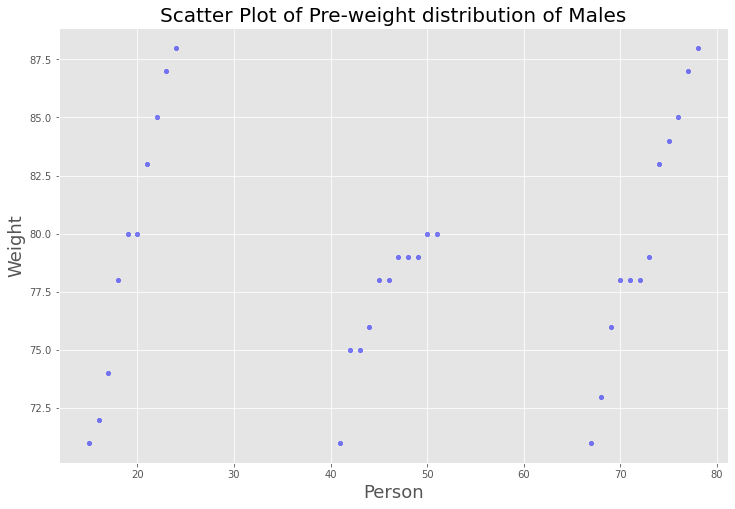

In [ ]:
axl = df[df['gender'] == 1].plot(kind='scatter', x='Person', y='pre.weight', color='blue', alpha=0.5, figsize=(12, 8))
plt.title('Scatter Plot of Pre-weight distribution of Males', size=20)
plt.xlabel('Person', size=18)
plt.ylabel('Weight', size=18)

Text(0, 0.5, 'Weight')

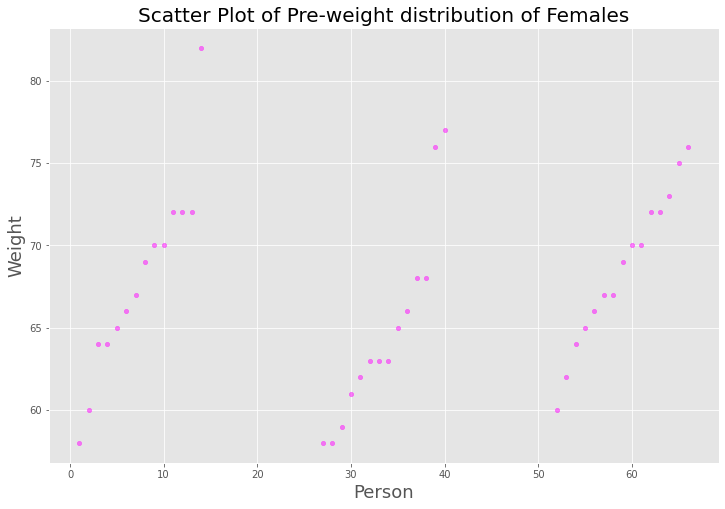

In [ ]:
axl = df[df['gender'] == 0].plot(kind='scatter', x='Person', y='pre.weight', color='magenta', alpha=0.5, figsize=(12, 8))
plt.title('Scatter Plot of Pre-weight distribution of Females', size=20)
plt.xlabel('Person', size=18)
plt.ylabel('Weight', size=18)

Text(0, 0.5, 'Pre-Weight')

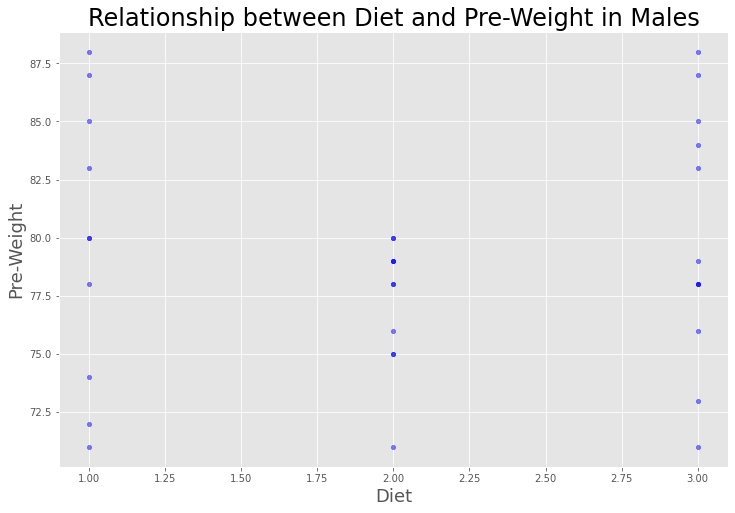

In [ ]:
# Scatter plot of Diet and Female Pre-Weight
ax1 = df[df['gender'] == 1].plot(kind='scatter', x='Diet', y='pre.weight', color='blue', alpha=0.5, figsize=(12, 8))
plt.title('Relationship between Diet and Pre-Weight in Males', size=24)
plt.xlabel('Diet', size=18)
plt.ylabel('Pre-Weight', size=18)

Text(0, 0.5, 'Pre-Weight')

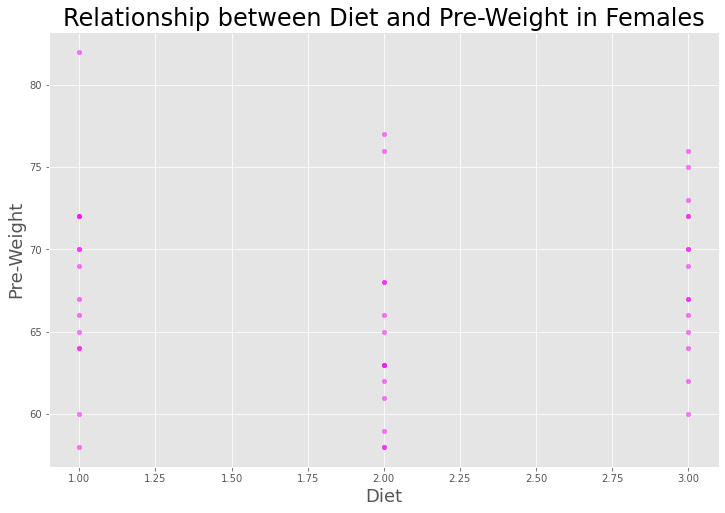

In [ ]:
# Scatter plot of Diet and Female weight6weeks
ax1 = df[df['gender'] == 0].plot(kind='scatter', x='Diet', y='pre.weight', color='magenta', alpha=0.5, figsize=(12, 8))
plt.title('Relationship between Diet and Pre-Weight in Females', size=24)
plt.xlabel('Diet', size=18)
plt.ylabel('Pre-Weight', size=18)

In [ ]:
df_male = df[df['gender'] == 1]
df_male.describe()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
count,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000
mean,47.606061,1.0,39.363636,175.242424,79.030303,2.060606,75.015152
std,22.149971,0.0,7.716938,12.326370,4.940172,0.826869,4.629398
min,15.000000,1.0,25.000000,155.000000,71.000000,1.000000,66.800000
25%,23.000000,1.0,35.000000,166.000000,76.000000,1.000000,71.600000
50%,47.000000,1.0,39.000000,175.000000,79.000000,2.000000,73.900000
75%,70.000000,1.0,44.000000,182.000000,83.000000,3.000000,79.100000
max,78.000000,1.0,54.000000,199.000000,88.000000,3.000000,84.500000


In [ ]:
df_male = df[df['gender'] == 0]
df_male.describe()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
count,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000
mean,33.930233,0.0,39.116279,167.348837,67.116279,2.023256,63.223256
std,21.791649,0.0,11.398014,9.456375,5.645096,0.830616,6.150874
min,1.000000,0.0,16.000000,141.000000,58.000000,1.000000,53.000000
25%,11.500000,0.0,31.000000,163.000000,63.000000,1.000000,59.750000
50%,34.000000,0.0,37.000000,169.000000,67.000000,2.000000,62.400000
75%,55.500000,0.0,48.000000,171.000000,71.000000,3.000000,67.500000
max,66.000000,0.0,60.000000,201.000000,82.000000,3.000000,81.100000


#Q2

In [ ]:
f_oneway(df[df['Diet']==1]['pre.weight'], df[df['Diet']==2]['pre.weight'], df[df['Diet']==3]['pre.weight'])

F_onewayResult(statistic=1.247834694837041, pvalue=0.29317702104020305)

Pvalue of 0.29 give significant evidence that we cannot reject null hypothesis

In [ ]:
f_oneway(df[df['Diet']==1]['weight6weeks'], df[df['Diet']==2]['weight6weeks'], df[df['Diet']==3]['weight6weeks'])

F_onewayResult(statistic=0.6190428460698888, pvalue=0.5412619353734642)

Pvalue of 0.54 give significant evidence that we cannot reject null hypothesis

#**Task 3**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")

In [ ]:
df.sample(10)

,patient,sex,agegrp,bp_before,bp_after
1,2,Male,30-45,163,170
103,104,Female,60+,148,148
0,1,Male,30-45,143,153
58,59,Male,60+,172,161
35,36,Male,46-59,159,171
38,39,Male,46-59,185,140
48,49,Male,60+,171,185
36,37,Male,46-59,149,157
37,38,Male,46-59,140,159
21,22,Male,46-59,156,155


#Q1

Text(0, 0.5, 'Post-BP')

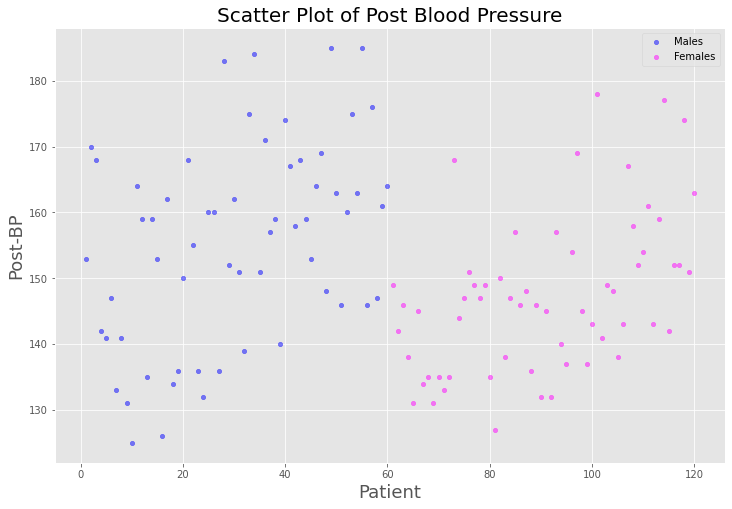

In [ ]:
axl = df[df['sex'] == "Male"].plot(kind='scatter', x = 'patient',  y='bp_after', color='blue', alpha=0.5, figsize=(12, 8))
df[df['sex'] == "Female"].plot(kind='scatter', x='patient', y='bp_after', color='magenta', alpha=0.5, figsize=(12, 8), ax = axl)
plt.legend(labels=['Males', 'Females'])
plt.title('Scatter Plot of Post Blood Pressure', size=20)
plt.xlabel('Patient', size=18)
plt.ylabel('Post-BP', size=18)

#Q2

In [ ]:
df_male = df[df['sex'] == 'Male'].set_index('patient')
df_female = df[df['sex'] == 'Female'].set_index('patient')

In [ ]:
# Descriptive statistics male
statistics_male = df_male.describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df_female.describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,bp_before_male,bp_after_male,bp_before_female,bp_after_female
count,60.000000,60.000000,60.000000,60.000000
mean,159.266667,155.516667,153.633333,147.200000
std,11.413442,15.243217,10.735600,11.742722
min,140.000000,125.000000,138.000000,127.000000
25%,150.750000,145.000000,144.750000,138.000000
50%,158.000000,158.500000,151.000000,146.000000
75%,170.000000,164.750000,161.250000,152.000000
max,185.000000,185.000000,185.000000,178.000000


#Q3

Null Hypothesis : Mean of blood pressure for both male and female are equal

Alternate Hypothesis : Mean of blood pressure for both male and female are different

In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind

stat, p = ttest_ind(df_male['bp_after'], df_female['bp_after'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3.348, p=0.001
Probably different distributions


In [ ]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

In [ ]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(df_male['bp_after'], df_female['bp_after'], alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=3.348, df=118, cv=1.658, p=0.001
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


We got t value as 3.348 and p = 0.001 which is less than significance level hence rejecting the Null Hypothesis

#**Task 4**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sp500_data.csv')

In [ ]:
df = df[['CVX', 'XOM']]

In [ ]:
def sample_mean(df, sample_size):
  sample_means = []
  for i in range(1000):
      df_temp = df.sample(sample_size)
      sample_means.append(df_temp.mean())
  return sample_means

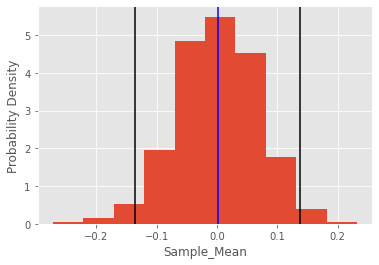

In [ ]:
sample_means = sample_mean(df['CVX'], 100)
mn = np.mean(sample_means)
std = np.std(sample_means)
plt.hist(sample_means, density = True)
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.xlabel('Sample_Mean')
plt.ylabel('Probability Density')
plt.show()

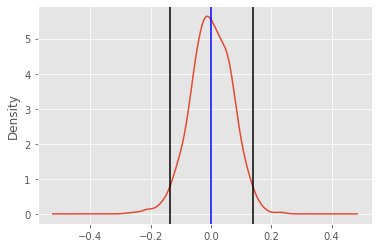

In [ ]:
s = pd.Series(sample_means)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

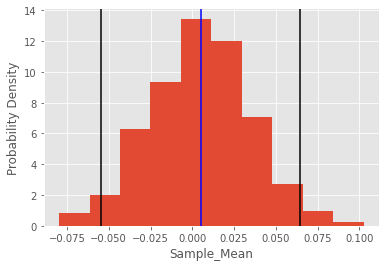

In [ ]:
sample_means = sample_mean(df['CVX'], 500)
mn = np.mean(sample_means)
std = np.std(sample_means)
plt.hist(sample_means, density = True)
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.xlabel('Sample_Mean')
plt.ylabel('Probability Density')
plt.show()

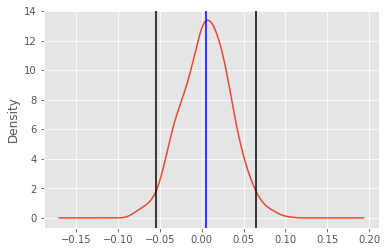

In [ ]:
s = pd.Series(sample_means)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

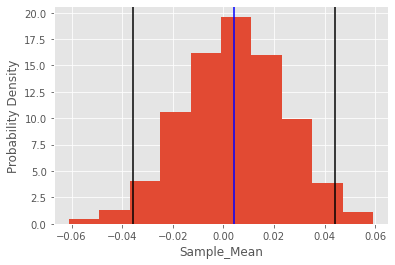

In [ ]:
sample_means = sample_mean(df['CVX'], 1000)
mn = np.mean(sample_means)
std = np.std(sample_means)
plt.hist(sample_means, density = True)
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.xlabel('Sample_Mean')
plt.ylabel('Probability Density')
plt.show()

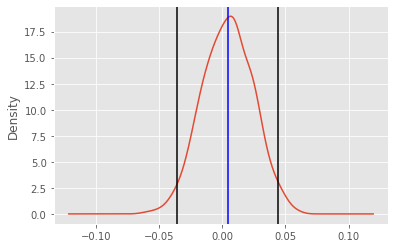

In [ ]:
s = pd.Series(sample_means)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

We observed that on increasing the sample size from 100 to 500 to 1000 the standard deviation of sample mean decreases.

#**Task 5**

In [ ]:
def sample_std(df, sample_size):
  sample_dev = []
  for i in range(1000):
      df_temp = df.sample(sample_size)
      sample_dev.append(df_temp.std())
  return sample_dev

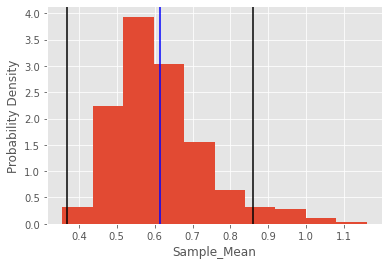

In [ ]:
sample_dev = sample_std(df['XOM'], 100)
mn = np.mean(sample_dev)
std = np.std(sample_dev)
plt.hist(sample_dev, density = True)
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.xlabel('Sample_Mean')
plt.ylabel('Probability Density')
plt.show()

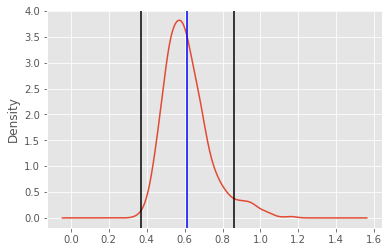

In [ ]:
s = pd.Series(sample_dev)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

On sampling standard deviation values on XOM sp500 values. We found that it is highly positively skewed

#**Task 6**

In [ ]:
def probability_red(probability, no_of_experiments):
  outcomes = []
  rng = np.random.RandomState(1)
  for i in range(no_of_experiments):
    dice_rolls = rng.choice(np.arange(4), size = 100, p=probability)
    num_six = (dice_rolls == 0).sum()
    outcomes.append(num_six)
  return outcomes

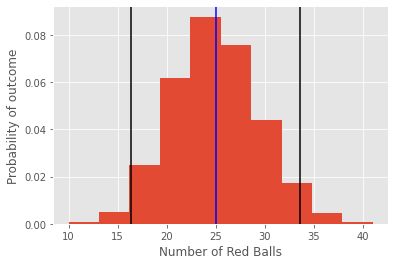

In [ ]:
outcomes = probability_red([0.25, 0.25, 0.25, 0.25], 10000)
mn = np.mean(outcomes)
std = np.std(outcomes)
plt.hist(outcomes, density=True)
plt.xlabel('Number of Red Balls')
plt.ylabel('Probability of outcome')
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.show()

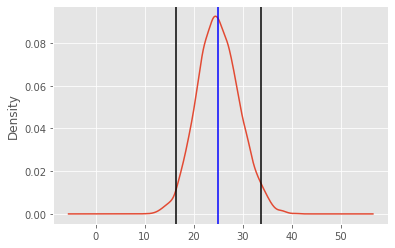

In [ ]:
s = pd.Series(outcomes)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

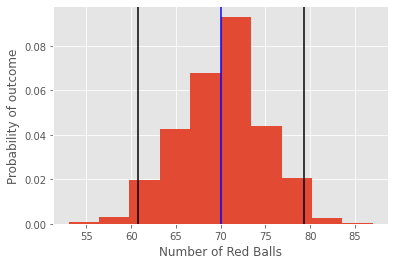

In [ ]:
outcomes = probability_red([0.7, 0.1, 0.1, 0.1], 10000)
mn = np.mean(outcomes)
std = np.std(outcomes)
plt.hist(outcomes, density=True)
plt.xlabel('Number of Red Balls')
plt.ylabel('Probability of outcome')
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')
plt.show()

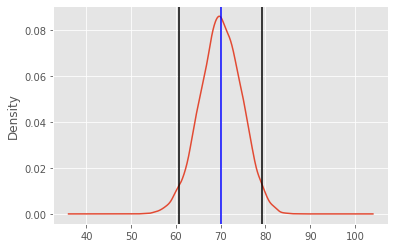

In [ ]:
s = pd.Series(outcomes)
mn = s.mean()
std = s.std()
ax = s.plot.kde()
plt.axvline(mn, color='blue')
plt.axvline(mn-2*std, color = 'black')
plt.axvline(mn+2*std, color = 'black')

We observed that the mean percentage of red balls is nearly equal to actual percentage of red balls in the bag. This is expected as no. of experiments done is large = 10000